# Classification Approch

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.neighbors import KNeighborsClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [15]:
filename = 'knn.pkl'#import model approch for  joblib

### PreProcess


In [16]:
names=['IR', 'MR', 'FF', 'Credibility', 'Competitiveness', 'OR', 'Class']
df = pd.read_csv('../Qualitative_Bankruptcy.data.txt',names=names)

#### Clean and Engeering Data

In [17]:
for col in names:
    print (df[col].value_counts())
    print ('\n****\n')

IR
N    89
A    81
P    80
Name: count, dtype: int64

****

MR
N    119
A     69
P     62
Name: count, dtype: int64

****

FF
N    119
A     74
P     57
Name: count, dtype: int64

****

Credibility
N    94
P    79
A    77
Name: count, dtype: int64

****

Competitiveness
N    103
P     91
A     56
Name: count, dtype: int64

****

OR
N    114
P     79
A     57
Name: count, dtype: int64

****

Class
NB    143
B     107
Name: count, dtype: int64

****



#### Split Data in Train/Test for X and y


In [18]:
X= df.drop(['Class'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y=df['Class']
y=y.map({'NB':1,'B':0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1099)

### Model

#### Create Model(s)

In [19]:
knn = KNeighborsClassifier()

#### Pipe

In [20]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [21]:
pipe = Pipeline([('knn',knn)])

In [22]:
#hyper param value
n_neighbors = list(range(1,14,2))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [23]:
hyper_param = {
    'knn__n_neighbors' : n_neighbors,
    'knn__algorithm' : algorithm
}

In [24]:
full_model =GridSearchCV(estimator=pipe,param_grid=hyper_param,cv=5,verbose=1)

#### Train Model

In [25]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             verbose=1)

### Evaluate model

#### Test On data

In [34]:
y_pred = full_model.predict(X_test)

#### Plots

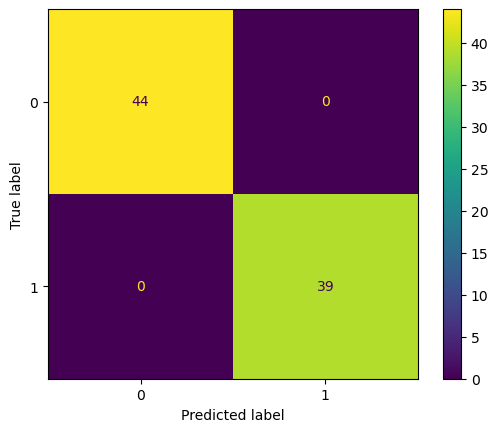

In [36]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

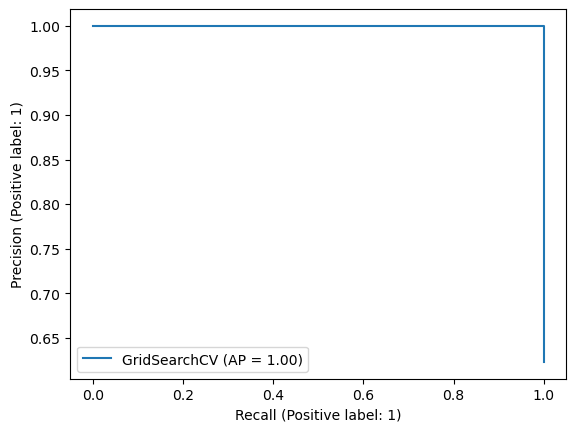

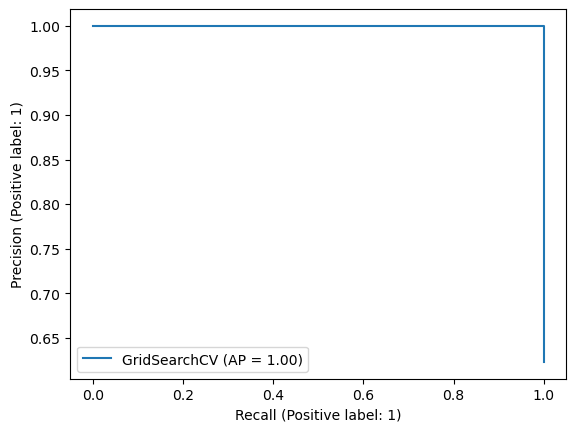

In [37]:
PrecisionRecallDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

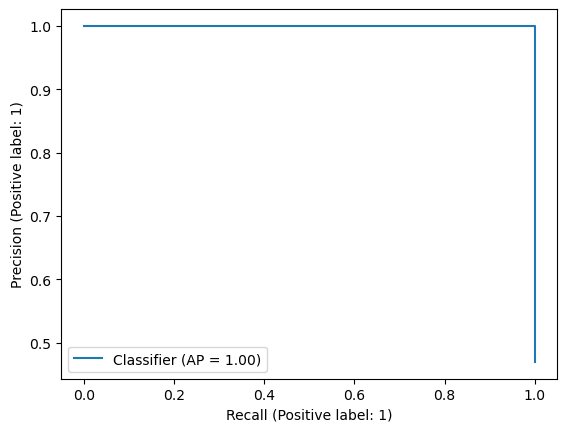

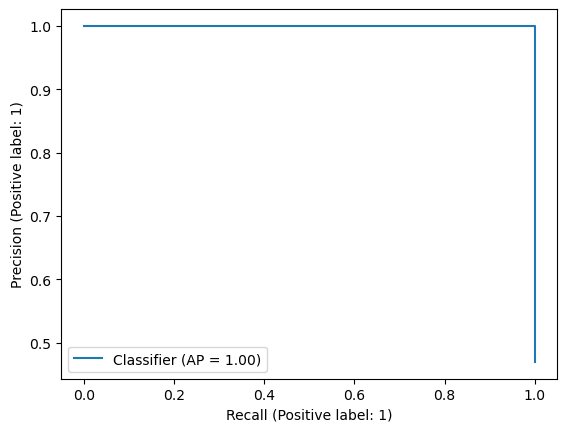

In [38]:
PrecisionRecallDisplay.from_predictions(y_pred=y_pred,
                                    y_true=y_test,).plot()

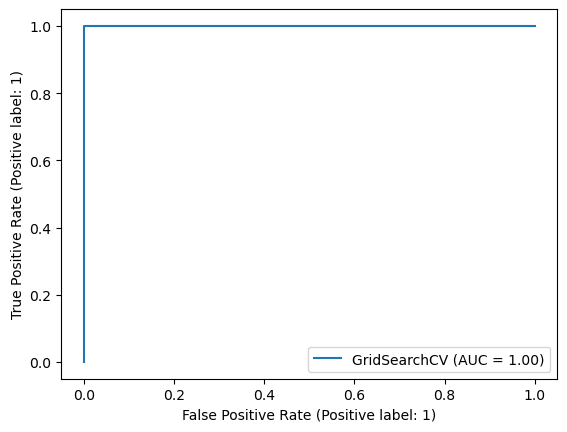

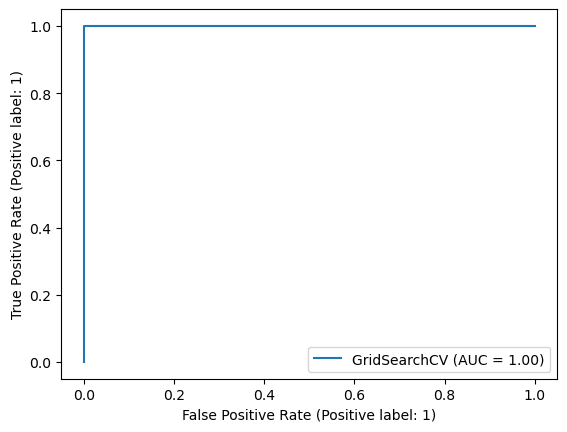

In [39]:
RocCurveDisplay.from_estimator(estimator=full_model,
                                     X=X_train,
                                     y=y_train).plot()

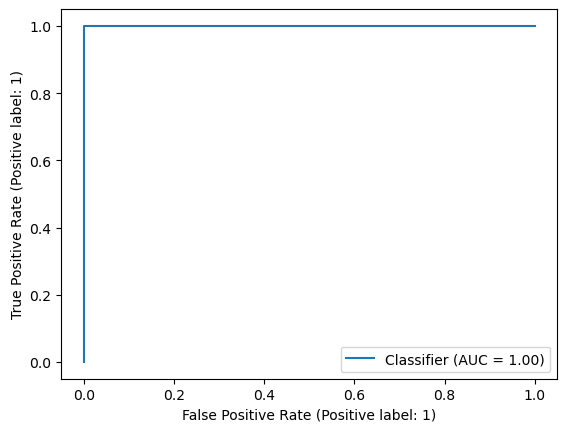

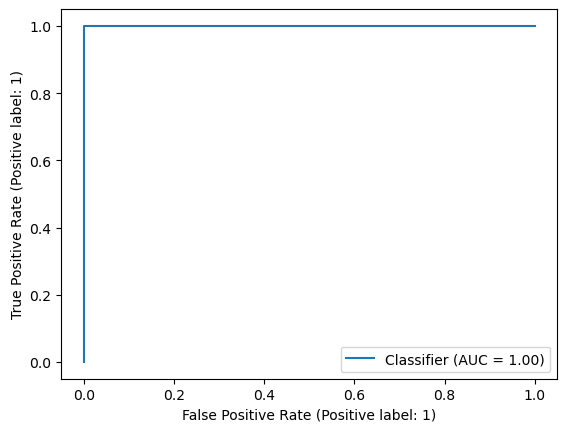

In [40]:
RocCurveDisplay.from_predictions(y_pred=y_pred,
                                 y_true=y_test).plot()

In [43]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        39

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [51]:
full_model.best_params_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 3}

### Final Model(s)


#### Train on all Data 

In [50]:
full_model.fit(X,y,fit_params=fit_params)

ValueError: 
All the 140 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 400, in fit
    fit_params_steps = self._check_fit_params(**fit_params)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 323, in _check_fit_params
    raise ValueError(
ValueError: Pipeline.fit does not accept the fit_params parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.


#### Save with joblib

In [45]:
import joblib
joblib.dump(value=full_model,filename=filename)

['knn.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
